# Library

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

# Data load

In [151]:
train=pd.read_csv('data/train.csv', index_col=0)
test=pd.read_csv('data/test_x.csv', index_col=0)
submission=pd.read_csv('data/sample_submission.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


In [152]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [153]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,...,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,...,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,...,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,...,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1


In [154]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

# 기본 정보와 QdE, QdA만 남기고 변수 제거

# missing 처리

In [155]:
#missing 확인
print('train : ',train.isnull().sum())
print('test : ',test.isnull().sum())

train :  QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64
test :  QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 76, dtype: int64


# Preprocessing

In [156]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

In [157]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,gender_code,age_group_code,race_code,religion_code
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,1,0,1,0,1,1,0,3,6,10
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,0,1,0,1,1,0,2,1,7
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,1,0,1,1,1,3,6,10
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,1,0,1,0,1,1,0,2,1,7
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,0,1,1,1,1,1,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,1,0,1,1,0,1,6,8
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,1,0,1,1,1,3,6,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,0,1,0,1,1,0,1,6,5


In [158]:
print(train.shape)

(45532, 77)


In [159]:
print(test.shape)

(11383, 76)


# Visualization

<BarContainer object of 2 artists>

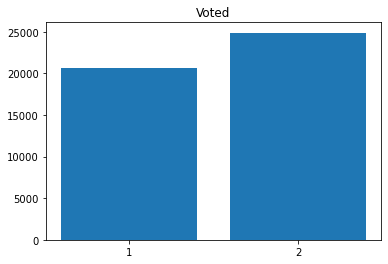

In [160]:
#target 변수의 분포 파악
train_y = train['voted']
train = train.drop('voted', axis=1)

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count= [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

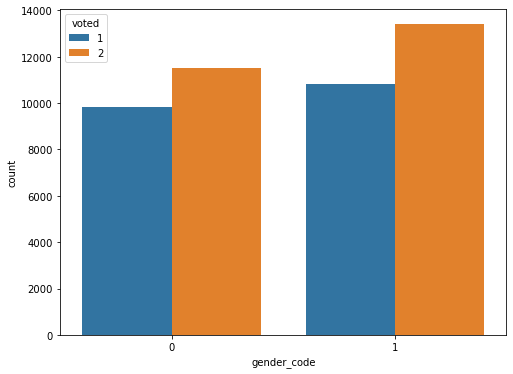

In [161]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender_code', hue = train_y)

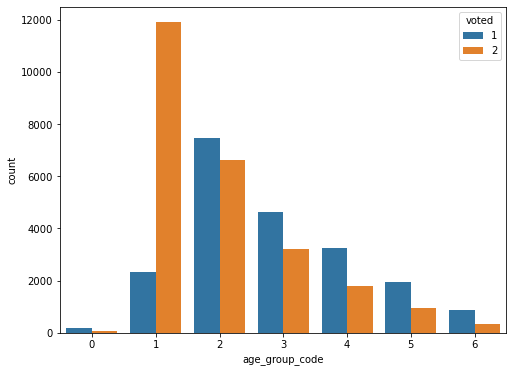

In [162]:
#굉장이 다른 성향을 보이는 age group이 존재
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group_code', hue = train_y)

# Question을 이용한 feature 추출 예시(코드 보류)

가설1: 고민 시간이 긴 질문은 영향을 많이 주는 질문일 것이다.-> Qd
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

가설2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다.
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

plot_to_voted(train, 'QaE', train_y.unique())

In [163]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

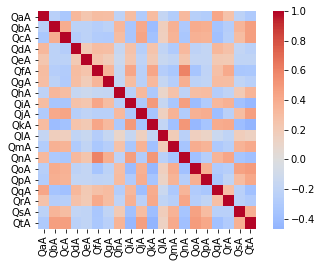

In [164]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

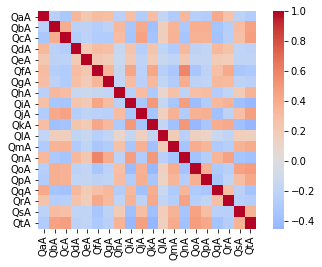

In [165]:
correlations = test[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [166]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

In [167]:
### test data에도 똑같이 적용.
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

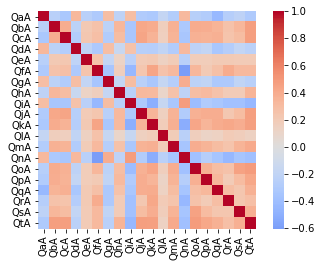

In [168]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

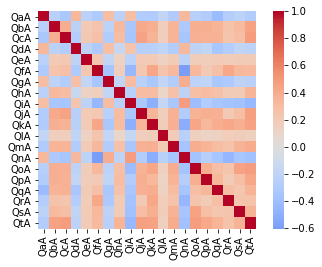

In [169]:
correlations = test[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [170]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

In [171]:
### test data에 적용.
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

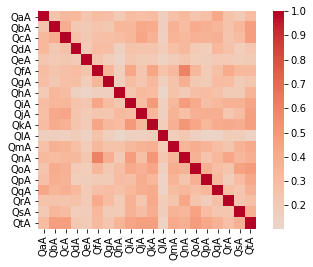

In [172]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

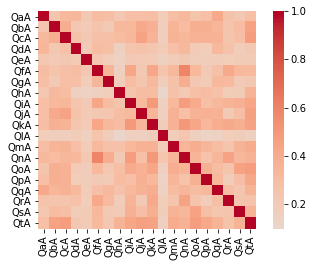

In [173]:
correlations = test[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [174]:
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_09,wr_10,wr_11,wr_12,wr_13,gender_code,age_group_code,race_code,religion_code,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,0,1,0,1,1,0,3,6,10,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,0,1,0,1,1,0,2,1,7,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,1,1,0,1,1,1,3,6,10,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,1,0,1,1,0,2,1,7,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,0,1,1,1,1,1,2,6,0,3.00


In [175]:
test['Mach_score'] = test[Answers].mean(axis = 1)
test.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_09,wr_10,wr_11,wr_12,wr_13,gender_code,age_group_code,race_code,religion_code,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,...,0,1,0,1,1,1,1,6,6,2.45
1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,...,0,0,0,0,0,1,1,5,3,2.80
2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,...,0,1,0,1,1,1,3,5,5,3.55
3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,...,1,1,1,1,1,1,6,6,3,3.35
4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,...,0,1,1,1,1,1,1,6,0,2.90


In [176]:
print(train.shape, test.shape)

(45532, 77) (11383, 77)


In [177]:
train_y

index
0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

# Modeling

In [178]:
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(train, train_y)

LGBMClassifier(n_estimators=500)

In [179]:
pred_y = model.predict(test)

In [180]:
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

# submission

In [ ]:
submission['voted']=pred_y

In [ ]:
submission

In [ ]:
submission.to_csv('/sample_submission.csv')